# PARTIE 1 : ANALYSE EXPLORATOIRE - S&P 500 STOCKS

Analyse exploratoire des données du S&P 500 avec visualisations

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set3")
%matplotlib inline

In [20]:
# Définir les stocks principaux du S&P 500 (top 50)
sp500_symbols = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "TSLA", "BRK.B", "JNJ", "V",
    "WMT", "JPM", "PG", "MA", "UNH", "HD", "DIS", "CRM", "MCD", "KO",
    "NFLX", "CSCO", "PEP", "ABT", "ABBV", "MMM", "XOM", "CVX", "BA", "COST",
    "AMD", "INTC", "QCOM", "PYPL", "TXN", "ADBE", "IBM", "AVGO", "ACN", "GILD",
    "CDNS", "MRVL", "OKTA", "CCI", "ANET", "SNPS", "ASML", "NOW", "PANW", "LRCX"
]

# Informations de secteur
sector_info = pd.DataFrame({
    'symbol': ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "TSLA", "BRK.B", "JNJ", "V",
               "WMT", "JPM", "PG", "MA", "UNH", "HD", "DIS", "CRM", "MCD", "KO",
               "NFLX", "CSCO", "PEP", "ABT", "ABBV", "MMM", "XOM", "CVX", "BA", "COST",
               "AMD", "INTC", "QCOM", "PYPL", "TXN", "ADBE", "IBM", "AVGO", "ACN", "GILD",
               "CDNS", "MRVL", "OKTA", "CCI", "ANET", "SNPS", "ASML", "NOW", "PANW", "LRCX"],
    'sector': ["Technology", "Technology", "Technology", "Consumer", "Technology", "Technology", "Consumer", "Finance", "Healthcare", "Finance",
               "Consumer", "Finance", "Consumer", "Finance", "Healthcare", "Consumer", "Consumer", "Technology", "Consumer", "Consumer",
               "Technology", "Technology", "Consumer", "Healthcare", "Healthcare", "Industrial", "Energy", "Energy", "Industrial", "Consumer",
               "Technology", "Technology", "Technology", "Finance", "Technology", "Technology", "Technology", "Technology", "Technology", "Healthcare",
               "Technology", "Technology", "Technology", "Real Estate", "Technology", "Technology", "Technology", "Technology", "Technology", "Technology"]
})

In [21]:
# Récupérer les données historiques (dernière année)
print("Récupération des données S&P 500...")
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

# Télécharger les données
sp500_data_list = []
for symbol in sp500_symbols:
    try:
        data = yf.download(symbol, start=start_date, end=end_date, progress=False)
        if not data.empty:  # Vérifier que des données ont été récupérées
            # Aplatir les colonnes si MultiIndex
            if isinstance(data.columns, pd.MultiIndex):
                data.columns = data.columns.get_level_values(0)
            data = data.reset_index()
            data['symbol'] = symbol
            sp500_data_list.append(data)
        else:
            print(f"Aucune donnée pour {symbol}")
    except Exception as e:
        print(f"Erreur pour {symbol}: {e}")

# Concaténer les données verticalement
sp500_data = pd.concat(sp500_data_list, axis=0, ignore_index=True)

# Standardiser les noms de colonnes
sp500_data.columns = sp500_data.columns.str.lower().str.replace(' ', '_')

# Joindre les secteurs
sp500_data = sp500_data.merge(sector_info, on='symbol', how='left')

print(f"Données chargées: {len(sp500_data)} lignes")
print(f"Actions récupérées: {sp500_data['symbol'].nunique()}")

Récupération des données S&P 500...


$BRK.B: possibly delisted; no timezone found

1 Failed download:
['BRK.B']: possibly delisted; no timezone found


Aucune donnée pour BRK.B
Données chargées: 12250 lignes
Actions récupérées: 49


## EXPLORATION INITIALE DES DONNÉES

In [22]:
print("=== EXPLORATION DES DONNÉES ===")
print(f"Dimensions initiales : {sp500_data.shape[0]} lignes x {sp500_data.shape[1]} colonnes")
print("\nPremières lignes:")
display(sp500_data.head())
print("\nInformations sur les colonnes:")
print(sp500_data.info())
print("\nStatistiques descriptives:")
display(sp500_data.describe())

=== EXPLORATION DES DONNÉES ===
Dimensions initiales : 12250 lignes x 8 colonnes

Premières lignes:


,date,close,high,low,open,volume,symbol,sector
0,2025-01-07,241.119476,244.444435,240.263348,241.885999,40856000,AAPL,Technology
1,2025-01-08,241.607254,242.612716,238.969192,240.830767,37628900,AAPL,Technology
2,2025-01-10,235.783615,239.078710,231.950943,238.929376,61710900,AAPL,Technology
3,2025-01-13,233.344635,233.613424,228.685713,232.478557,49630700,AAPL,Technology
4,2025-01-14,232.229675,235.056885,231.423325,233.693058,39435300,AAPL,Technology



Informations sur les colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12250 non-null  datetime64[ns]
 1   close   12250 non-null  float64       
 2   high    12250 non-null  float64       
 3   low     12250 non-null  float64       
 4   open    12250 non-null  float64       
 5   volume  12250 non-null  int64         
 6   symbol  12250 non-null  object        
 7   sector  12250 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 765.8+ KB
None

Statistiques descriptives:


,date,close,high,low,open,volume
count,12250,12250.000000,12250.000000,12250.000000,12250.000000,1.225000e+04
mean,2025-07-07 22:56:38.399999744,244.961989,247.833083,241.928777,244.911745,2.062981e+07
min,2025-01-07 00:00:00,18.129999,18.990000,17.670000,18.070000,2.298000e+05
25%,2025-04-08 00:00:00,114.583620,115.900002,113.020856,114.372501,4.310450e+06
50%,2025-07-09 12:00:00,182.455406,184.735211,179.682993,182.512617,8.125050e+06
75%,2025-10-07 00:00:00,308.901619,311.880263,305.695753,309.046314,1.802435e+07
max,2026-01-06 00:00:00,1242.189941,1246.380005,1222.420044,1222.819946,8.188309e+08
std,NaN,193.045332,194.980265,190.982152,193.020479,4.018641e+07


## NETTOYAGE DES DONNÉES

In [23]:
print("=== NETTOYAGE DES DONNÉES ===")

# 1. Vérifier les valeurs manquantes (NA)
print("\n1. Vérification des valeurs manquantes (NA):")
na_count = sp500_data.isna().sum()
print(na_count)
print(f"Total de valeurs manquantes: {na_count.sum()}")

# 2. Vérifier les doublons
print("\n2. Vérification des doublons:")
duplicates = sp500_data.duplicated(subset=['symbol', 'date']).sum()
print(f"Nombre de lignes dupliquées (symbol + date): {duplicates}")

# 3. Supprimer les lignes avec des valeurs manquantes importantes
print("\n3. Suppression des lignes avec NA dans les colonnes critiques:")
nrow_before = len(sp500_data)
sp500_data = sp500_data.dropna(subset=['close', 'volume', 'sector'])
nrow_after = len(sp500_data)
print(f"Lignes supprimées: {nrow_before - nrow_after}")
print(f"Lignes restantes: {nrow_after}")

# 4. Supprimer les doublons exacts
print("\n4. Suppression des doublons:")
nrow_before = len(sp500_data)
sp500_data = sp500_data.drop_duplicates(subset=['symbol', 'date'])
nrow_after = len(sp500_data)
print(f"Doublons supprimés: {nrow_before - nrow_after}")

# 5. Vérifier la cohérence des données
print("\n5. Vérification de la cohérence:")
print(f"- Prix négatifs: {(sp500_data['close'] < 0).sum()}")
print(f"- Volumes négatifs: {(sp500_data['volume'] < 0).sum()}")
print(f"- Dates valides: {(sp500_data['date'] >= (datetime.now() - timedelta(days=400))).all()}")

# 6. Résumé final
print("\n=== RÉSUMÉ DU NETTOYAGE ===")
print(f"Dataset final: {sp500_data.shape[0]} lignes x {sp500_data.shape[1]} colonnes")
print(f"Période: {sp500_data['date'].min()} à {sp500_data['date'].max()}")
print(f"Nombre d'actions uniques: {sp500_data['symbol'].nunique()}")
print(f"Secteurs représentés: {sp500_data['sector'].nunique()}")

=== NETTOYAGE DES DONNÉES ===

1. Vérification des valeurs manquantes (NA):
date      0
close     0
high      0
low       0
open      0
volume    0
symbol    0
sector    0
dtype: int64
Total de valeurs manquantes: 0

2. Vérification des doublons:
Nombre de lignes dupliquées (symbol + date): 0

3. Suppression des lignes avec NA dans les colonnes critiques:
Lignes supprimées: 0
Lignes restantes: 12250

4. Suppression des doublons:
Doublons supprimés: 0

5. Vérification de la cohérence:
- Prix négatifs: 0
- Volumes négatifs: 0
- Dates valides: True

=== RÉSUMÉ DU NETTOYAGE ===
Dataset final: 12250 lignes x 8 colonnes
Période: 2025-01-07 00:00:00 à 2026-01-06 00:00:00
Nombre d'actions uniques: 49
Secteurs représentés: 7


## GRAPHIQUE 1 : Histogramme des prix de fermeture actuels

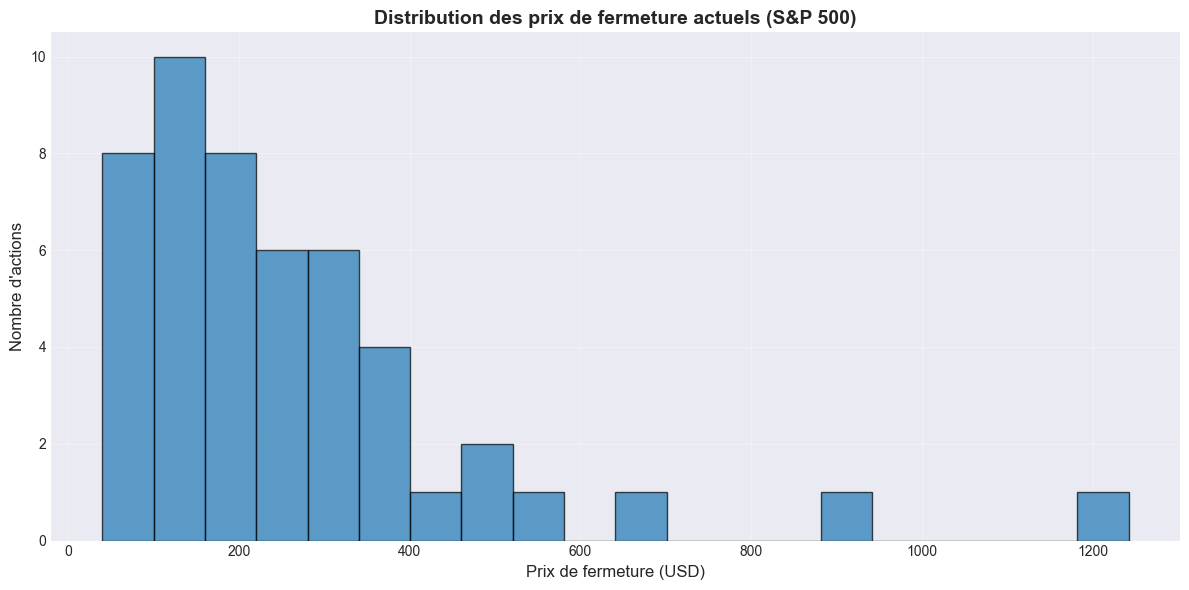

In [24]:
# Prix les plus récents
latest_prices = sp500_data.sort_values('date').groupby('symbol').tail(1)

plt.figure(figsize=(12, 6))
plt.hist(latest_prices['close'], bins=20, color='#1f77b4', edgecolor='black', alpha=0.7)
plt.xlabel('Prix de fermeture (USD)', fontsize=12)
plt.ylabel('Nombre d\'actions', fontsize=12)
plt.title('Distribution des prix de fermeture actuels (S&P 500)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## GRAPHIQUE 2 : Top 15 stocks par prix de fermeture

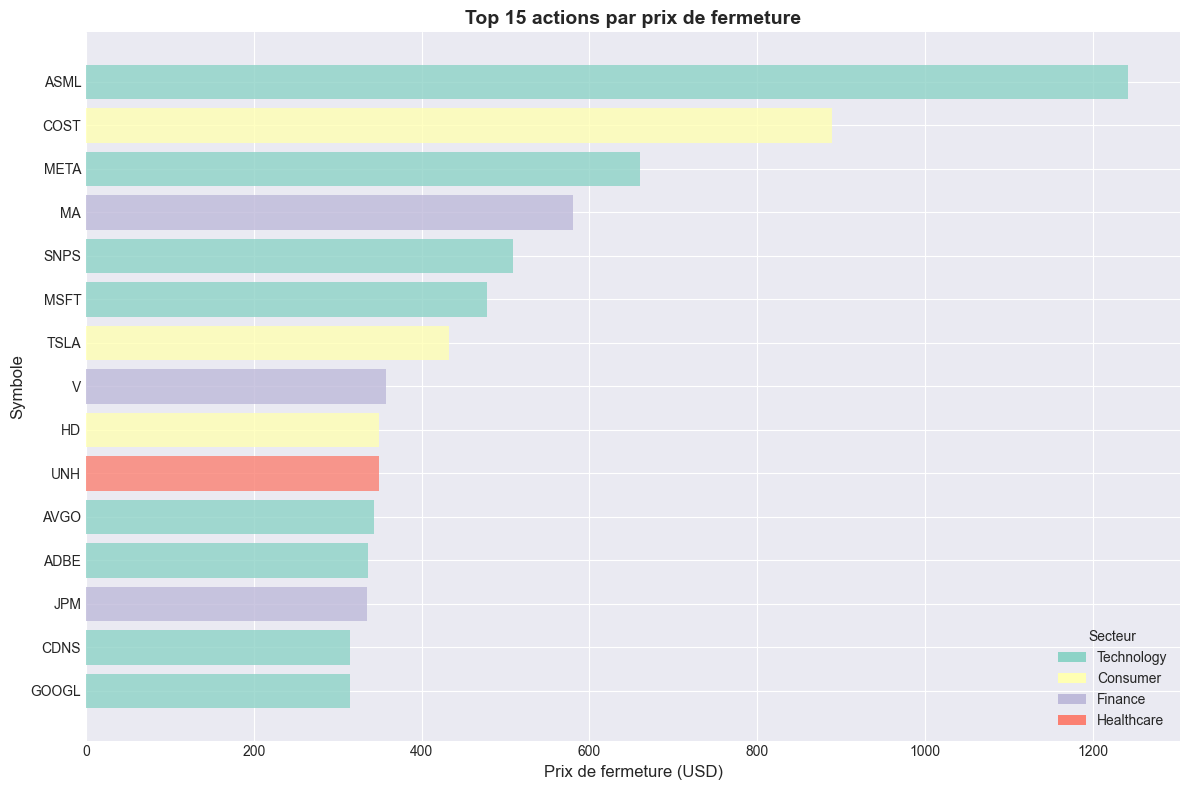

In [25]:
top_price = latest_prices.nlargest(15, 'close')

plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(range(len(top_price['sector'].unique())))
sector_colors = dict(zip(top_price['sector'].unique(), colors))
bar_colors = [sector_colors[s] for s in top_price['sector']]

plt.barh(top_price['symbol'], top_price['close'], color=bar_colors, alpha=0.8)
plt.xlabel('Prix de fermeture (USD)', fontsize=12)
plt.ylabel('Symbole', fontsize=12)
plt.title('Top 15 actions par prix de fermeture', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Légende
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=sector_colors[s], label=s) for s in top_price['sector'].unique()]
plt.legend(handles=legend_elements, title='Secteur', loc='lower right')
plt.tight_layout()
plt.show()

## GRAPHIQUE 3 : Distribution par secteur

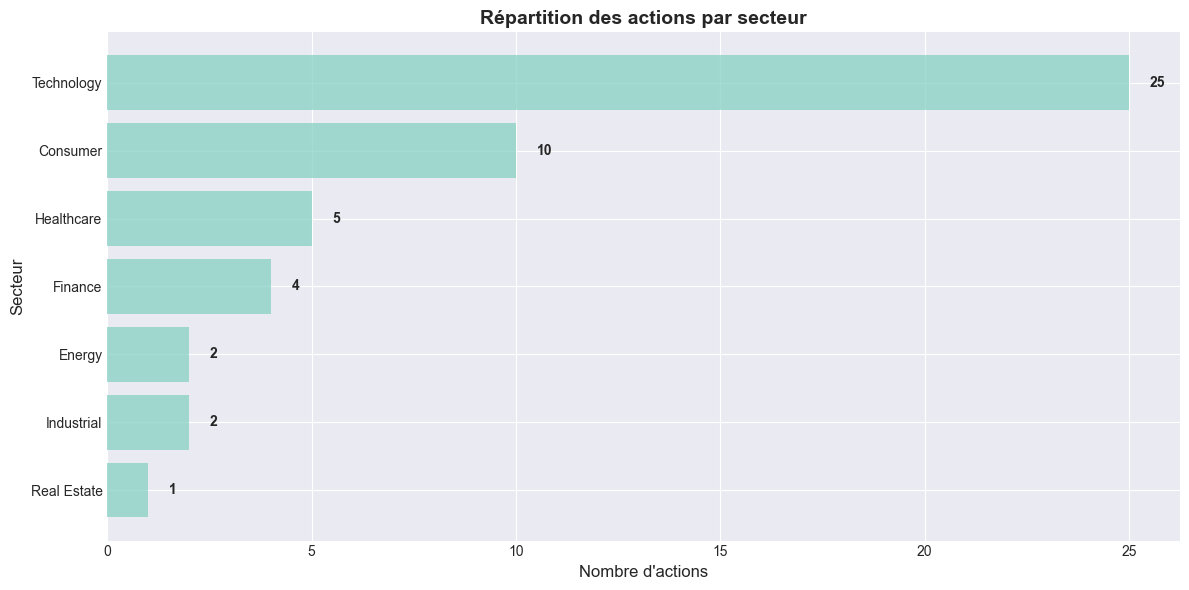

In [26]:
sector_count = latest_prices.groupby('sector').agg(
    count=('symbol', 'count'),
    avg_price=('close', 'mean')
).reset_index().sort_values('count', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.barh(sector_count['sector'], sector_count['count'], alpha=0.8)
plt.xlabel('Nombre d\'actions', fontsize=12)
plt.ylabel('Secteur', fontsize=12)
plt.title('Répartition des actions par secteur', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Ajouter les valeurs sur les barres
for i, v in enumerate(sector_count['count']):
    plt.text(v + 0.5, i, str(v), fontweight='bold', va='center')

plt.tight_layout()
plt.show()

## GRAPHIQUE 4 : Volatilité (écart-type des rendements) par secteur

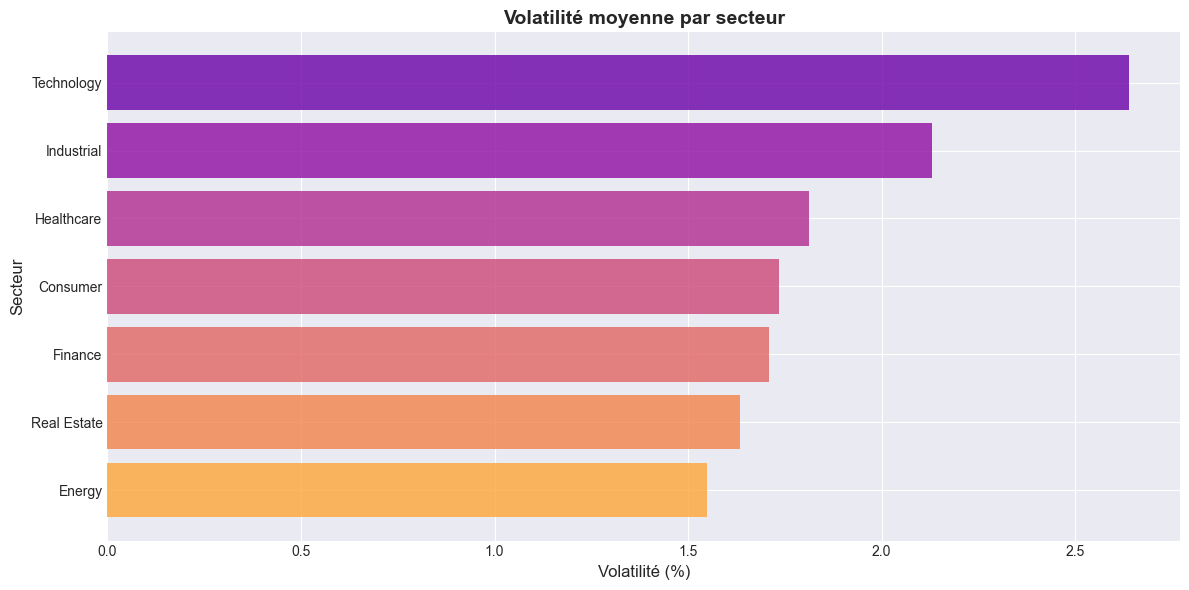

In [27]:
# Calculer les rendements
sp500_data_sorted = sp500_data.sort_values(['symbol', 'date'])
sp500_data_sorted['returns'] = sp500_data_sorted.groupby('symbol')['close'].pct_change() * 100

# Calculer la volatilité par action puis par secteur
volatility = sp500_data_sorted.groupby(['symbol', 'sector'])['returns'].std().reset_index()
volatility.columns = ['symbol', 'sector', 'volatility']
avg_volatility = volatility.groupby('sector')['volatility'].mean().reset_index()
avg_volatility = avg_volatility.sort_values('volatility', ascending=False)

plt.figure(figsize=(12, 6))
# Générer les couleurs depuis le colormap
colors = plt.cm.plasma(np.linspace(0.2, 0.8, len(avg_volatility)))
plt.barh(avg_volatility['sector'], avg_volatility['volatility'], color=colors, alpha=0.8)
plt.xlabel('Volatilité (%)', fontsize=12)
plt.ylabel('Secteur', fontsize=12)
plt.title('Volatilité moyenne par secteur', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## GRAPHIQUE 5 : Volume moyen par secteur

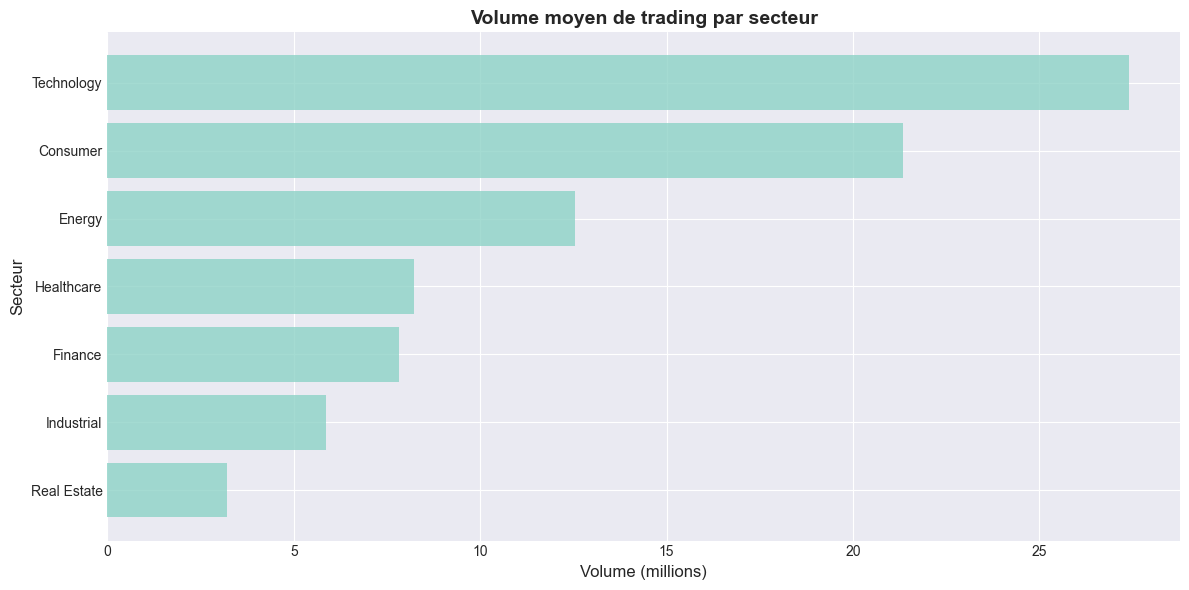


✓ Partie 1 complétée : Analyse exploratoire


In [28]:
volume_by_sector = sp500_data.groupby('sector')['volume'].mean().reset_index()
volume_by_sector['volume'] = volume_by_sector['volume'] / 1e6  # En millions
volume_by_sector = volume_by_sector.sort_values('volume', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(volume_by_sector['sector'], volume_by_sector['volume'], alpha=0.8)
plt.xlabel('Volume (millions)', fontsize=12)
plt.ylabel('Secteur', fontsize=12)
plt.title('Volume moyen de trading par secteur', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n✓ Partie 1 complétée : Analyse exploratoire")